# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
#list_of_cities, = cities
cities_df = pd.DataFrame({
    "Cities": cities,
    "Cloudiness": '', 
    "Country": '', 
    "Date": '', 
    "Humidity": '',
    "Latitude": '', 
    "Longitude": '', 
    "Max Temp": '', 
    "Wind Speed": ''
    })
cities_df.head()


,Cities,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,mataura,,,,,,,,
1,ushuaia,,,,,,,,
2,ullapool,,,,,,,,
3,goderich,,,,,,,,
4,saint-joseph,,,,,,,,


In [59]:
print('''Beginning Data Retrival
---------------------
''')

row_count = 1
index = 0 

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}units=Imperial&appid={api_key}&q={city}"
    weather_response = requests.get(query_url).json()
    
    print(f"Processing Record {row_count} | {city}")
    print(query_url)
    
    try:
        cities_df.at[index, "Cloudiness"] = int(weather_response.get("clouds").get("all"))
        cities_df.at[index, "Country"] = weather_response.get("sys").get("country")
        cities_df.at[index, "Date"] = weather_response.get("dt")
        cities_df.at[index, "Humidity"] = int(weather_response.get("main").get("humidity"))
        cities_df.at[index, "Latitude"] = int(weather_response.get("coord").get("lat"))
        cities_df.at[index, "Longitude"] = int(weather_response.get("coord").get("lon"))
        cities_df.at[index, "Max Temp"] = int(weather_response.get("main").get("temp_max"))
        cities_df.at[index, "Wind Speed"] = int(weather_response.get("wind").get("speed"))
        
        
    except (AttributeError) as e:
        print("Missing Field. Skipping")
    
    row_count += 1
    index += 1
    

Beginning Data Retrival
---------------------

Processing Record 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=mataura
Processing Record 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=ushuaia
Processing Record 3 | ullapool
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=ullapool
Processing Record 4 | goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=goderich
Processing Record 5 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=saint-joseph
Processing Record 6 | avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=avera
Processing Record 7 | koutsouras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&ap

Processing Record 57 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=ponta delgada
Processing Record 58 | auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=auki
Processing Record 59 | ust-omchug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=ust-omchug
Processing Record 60 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=taolanaro
Missing Field. Skipping
Processing Record 61 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=nikolskoye
Processing Record 62 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=saint george
Processing Record 63 | shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 113 | tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=tura
Processing Record 114 | maun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=maun
Processing Record 115 | koppang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=koppang
Processing Record 116 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=barrow
Processing Record 117 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=saldanha
Processing Record 118 | houma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=houma
Processing Record 119 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=umzimvubu
Missing Fie

Processing Record 169 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=carnarvon
Processing Record 170 | kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=kenai
Processing Record 171 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=tasiilaq
Processing Record 172 | beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=beyneu
Processing Record 173 | sorvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=sorvag
Missing Field. Skipping
Processing Record 174 | erzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=erzin
Processing Record 175 | kousseri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c41

Processing Record 226 | amuntai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=amuntai
Processing Record 227 | joshimath
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=joshimath
Processing Record 228 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=tsihombe
Missing Field. Skipping
Processing Record 229 | chitipa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=chitipa
Processing Record 230 | sri aman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=sri aman
Processing Record 231 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=severo-yeniseyskiy
Processing Record 232 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 283 | mezen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=mezen
Processing Record 284 | mkushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=mkushi
Processing Record 285 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=port elizabeth
Processing Record 286 | poitiers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=poitiers
Processing Record 287 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=san patricio
Processing Record 288 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=kavaratti
Processing Record 289 | lermontovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb4

Processing Record 338 | tellin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=tellin
Processing Record 339 | gold coast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=gold coast
Processing Record 340 | hidalgotitlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=hidalgotitlan
Processing Record 341 | the valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=the valley
Processing Record 342 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=naze
Processing Record 343 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=thinadhoo
Processing Record 344 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292

Processing Record 394 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=ilulissat
Processing Record 395 | ilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=ilo
Processing Record 396 | abu dhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=abu dhabi
Processing Record 397 | westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=westport
Processing Record 398 | belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=belaya gora
Processing Record 399 | takoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=takoradi
Processing Record 400 | stoyba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420d

Processing Record 451 | inirida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=inirida
Processing Record 452 | kem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=kem
Processing Record 453 | moose factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=moose factory
Processing Record 454 | rungata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=rungata
Missing Field. Skipping
Processing Record 455 | komatipoort
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=komatipoort
Processing Record 456 | omachi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=omachi
Processing Record 457 | kalianget
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e

Processing Record 506 | gulf gate estates
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=gulf gate estates
Processing Record 507 | chilca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=chilca
Processing Record 508 | samusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=samusu
Missing Field. Skipping
Processing Record 509 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=lagoa
Processing Record 510 | neuquen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=neuquen
Processing Record 511 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=kamenskoye
Missing Field. Skipping
Processing Record 512 | seddon
http://api.openweathermap.org/data/2.5/weathe

Processing Record 563 | boffa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=boffa
Processing Record 564 | zaysan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=zaysan
Processing Record 565 | west helena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=west helena
Processing Record 566 | biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=biak
Processing Record 567 | dawson creek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=dawson creek
Processing Record 568 | paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=paita
Processing Record 569 | manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=man

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,mataura,0,NZ,1554577685,73,-46,168,24,2
1,ushuaia,90,AR,1554573600,65,-54,-68,41,24
2,ullapool,8,GB,1554577819,80,57,-5,46,3
3,goderich,0,CA,1554577907,73,43,-81,53,4
4,saint-joseph,92,FR,1554577855,87,43,6,50,3


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [61]:
cols = ["Cloudiness","Humidity","Latitude","Longitude","Max Temp","Wind Speed"]
cities_df[cols] = cities_df[cols].apply(pd.to_numeric, errors = "coerce")
cities_df.dtypes

Cities         object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Latitude      float64
Longitude     float64
Max Temp      float64
Wind Speed    float64
dtype: object

#### Latitude vs. Temperature Plot

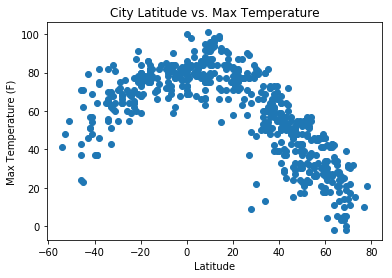

In [63]:
plt.scatter(cities_df["Latitude"], cities_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("City Latitude versus Max Temperature - Bubble Plot")
plt.show()

#### Latitude vs. Humidity Plot

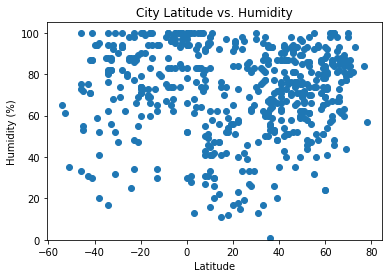

In [64]:
plt.scatter(cities_df["Latitude"], cities_df["Humidity"])
plt.ylim(0,105)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("City Latitude versus Humidity - Bubble Plot")
plt.show()

#### Latitude vs. Cloudiness Plot

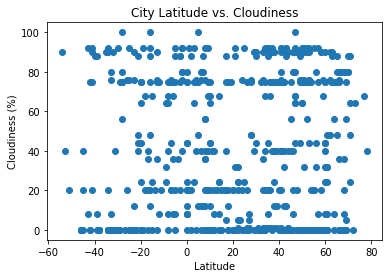

In [65]:
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("City Latitude versus Cloudiness - Bubble Plot")
plt.show()

#### Latitude vs. Wind Speed Plot

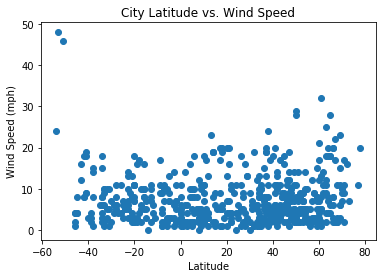

In [66]:
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("City Latitude versus Wind Speed - Bubble Plot")
plt.show()